In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("datasets train/bekasi.csv")

In [3]:
df.head()

,created_at,text,tweet_en
0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...,Plt. Telaga Murni Puskesmas Gandatua Ariston S...
1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...,Thalassemia Room and Blood Bank Bekasi Distric...
2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ...","Since the beginning of 2016, 7 people have die..."
3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...,Revealing Pregnancy Rate in Bekasi Regency dur...
4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...,Latest: BREAKING NEWS: Former Managing Directo...


In [4]:
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [5]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...,Plt. Telaga Murni Puskesmas Gandatua Ariston S...,0.000,0.000
1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...,Thalassemia Room and Blood Bank Bekasi Distric...,0.000,0.000
2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ...","Since the beginning of 2016, 7 people have die...",0.375,-0.125
3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...,Revealing Pregnancy Rate in Bekasi Regency dur...,0.000,0.000
4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...,Latest: BREAKING NEWS: Former Managing Directo...,0.450,0.250
...,...,...,...,...,...
528,Fri Feb 13 00:26:19 +0000 2015,#InfoBUC Kasus DBD Kabupaten Bekasi Alami Penu...,#InfoBUC Bekasi District's DHF cases have decr...,0.700,-0.400
529,Thu Oct 30 16:07:57 +0000 2014,Cara Berobat ke RSUD Kabupaten Bekasi Mengguna...,How to go to Bekasi District Hospital using BP...,0.000,0.000
530,Tue May 07 15:26:14 +0000 2019,Ketua KPU Kabupaten Bekasi Dilarikan ke Rumah ...,The Chairperson of the Bekasi Regency KPU Is T...,0.000,0.000
531,Thu Jul 26 15:00:48 +0000 2018,"Dari 39 Puskesmas Di Kabupaten Bekasi, 3 Puske...","Out of 39 Puskesmas in Bekasi District, 3 Pusk...",0.000,0.000


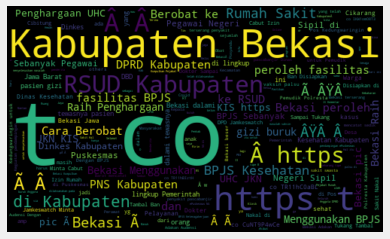

In [6]:
#wordcloud
allwords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [7]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...,Plt. Telaga Murni Puskesmas Gandatua Ariston S...,0.000,0.000,Neutral
1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...,Thalassemia Room and Blood Bank Bekasi Distric...,0.000,0.000,Neutral
2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ...","Since the beginning of 2016, 7 people have die...",0.375,-0.125,Negative
3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...,Revealing Pregnancy Rate in Bekasi Regency dur...,0.000,0.000,Neutral
4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...,Latest: BREAKING NEWS: Former Managing Directo...,0.450,0.250,Positive
...,...,...,...,...,...,...
528,Fri Feb 13 00:26:19 +0000 2015,#InfoBUC Kasus DBD Kabupaten Bekasi Alami Penu...,#InfoBUC Bekasi District's DHF cases have decr...,0.700,-0.400,Negative
529,Thu Oct 30 16:07:57 +0000 2014,Cara Berobat ke RSUD Kabupaten Bekasi Mengguna...,How to go to Bekasi District Hospital using BP...,0.000,0.000,Neutral
530,Tue May 07 15:26:14 +0000 2019,Ketua KPU Kabupaten Bekasi Dilarikan ke Rumah ...,The Chairperson of the Bekasi Regency KPU Is T...,0.000,0.000,Neutral
531,Thu Jul 26 15:00:48 +0000 2018,"Dari 39 Puskesmas Di Kabupaten Bekasi, 3 Puske...","Out of 39 Puskesmas in Bekasi District, 3 Pusk...",0.000,0.000,Neutral


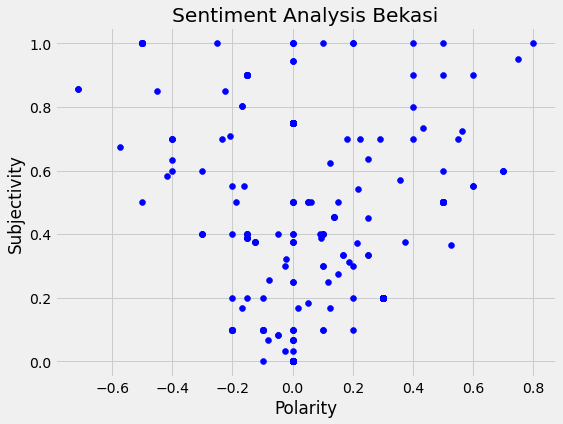

In [8]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Bekasi")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

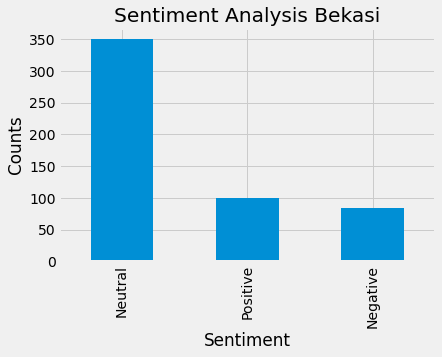

In [9]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Bekasi")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [10]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]

In [11]:
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...,0.000,0.000,Neutral
1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...,0.000,0.000,Neutral
2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ...",0.375,-0.125,Negative
3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...,0.000,0.000,Neutral
4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...,0.450,0.250,Positive
...,...,...,...,...,...
528,Fri Feb 13 00:26:19 +0000 2015,#InfoBUC Kasus DBD Kabupaten Bekasi Alami Penu...,0.700,-0.400,Negative
529,Thu Oct 30 16:07:57 +0000 2014,Cara Berobat ke RSUD Kabupaten Bekasi Mengguna...,0.000,0.000,Neutral
530,Tue May 07 15:26:14 +0000 2019,Ketua KPU Kabupaten Bekasi Dilarikan ke Rumah ...,0.000,0.000,Neutral
531,Thu Jul 26 15:00:48 +0000 2018,"Dari 39 Puskesmas Di Kabupaten Bekasi, 3 Puske...",0.000,0.000,Neutral
